# Laboratorio 4a - Text segmentation

Si richiede un'implementazione di un sistema di text segmentation, prendendo ispirazione da TextTiling.
In particolare, partendo da un corpus composto da almeno tre sezioni su tematiche molto diverse (ad es. potete usare paragrafi da tre pagine di Wikipedia diverse), dovrete testare il vostro sistema in modo che riesca a individuare le giuste linee di taglio (o quasi).

## Import delle librerie

In [32]:
base_folder = './data'
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import spacy
from operator import itemgetter
import numpy as np

## Dati del problema

Il file preso in input contiene quattro topic ben distinti, la variabile *cuts* contiene gli indici che vorremmo ottenere dall'algoritmo di TextTiling. L'indice di cut corrisponde alla prima riga da cui parte il testo successivo.

Per verificare la robustezza dell'algoritmo, è disponibile un secondo dataset con argomenti di lunghezze sensibilmente diverse e con tematiche simili.

In [33]:
corpus_path = f'{base_folder}/fused_text_easy.txt'
cuts = [12, 26, 43]

corpus_path_hard = f'{base_folder}/fused_text_difficult.txt'
cuts_hard = [17, 43, 47]
cuts_num = 3

Per svolgere il task bisogna prendere in analisi soltanto le *content word*. I metodi sottostanti permettono di trasformare il testo in una lista di liste contenenti parole *content*.

In [34]:
def read_file(path):
    with open(path) as f:
        return [line.strip() for line in f if not line.startswith('#')]

In [35]:
nlp = spacy.load('en_core_web_sm')
stopwords = stopwords.words('english')

def get_content_words(phrase):
    return [word.lemma_.lower() for word in nlp(phrase) if word.is_alpha and word.text not in stopwords and word.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]

In [36]:
lines_easy = [get_content_words(line) for line in read_file(corpus_path)]
line_hard = [get_content_words(line) for line in read_file(corpus_path_hard)]

Si utilizza l'overlap lessicale per misurare la coerenza tra i vari paragrafi.

In [37]:
def overlap_sim(s1, s2):
    return len([x for x in s1 if x in s2]) / min(len(s1), len(s2))

## Plotting dei dati in input

Il grafico riportato illustra la relazione di similarità tra i vari paragrafi, le linee verdi corrispondono ai tagli che vorremmo ottenere, mentre quelle rosse corrispondono ai tagli ottenuti dividendo in parti uguali i paragrafi del file in input.

In [38]:
def print_graph(lines, computed):
    x_point = [x for x in range(len(lines) - 1)]
    y_point = []
    for i in range(len(lines) - 1):
        y_point.append(overlap_sim(lines[i], lines[i+1]))
    for i in range(cuts_num):
        plt.axvline(x=cuts[i], color='g', ls='-.')
        plt.axvline(x=computed[i], color='r', ls='--')
    plt.plot(x_point, y_point)

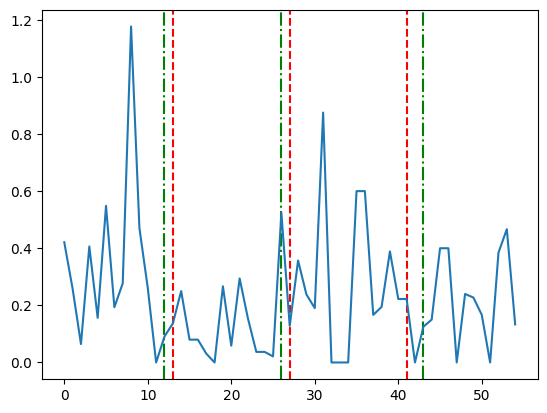

In [39]:
computed_cuts = [int((i+1)*(len(lines_easy) - 1)/(cuts_num+1)) for i in range(cuts_num)]
print_graph(lines_easy, computed_cuts)

## Frequenza delle parole

Di seguito viene riportata una tabella che associa ad ogni termine la rispettiva frequenza assoluta e quella relativa ai singoli paragrafi. I dati sono stampati a partire dal termine più frequente.

In [40]:
def get_ds(lines):
    words = set()
    for line in lines:
        words.update(set(line))
    words = list([word for word in words if len(words) > 2])
    headers = ['count', 'word']
    headers.extend([x for x in range(0, len(lines))])

    freqs = []
    for word in words:
        to_append = [0, word]
        to_append.extend([line.count(word) for line in lines])
        to_append[0] = sum(to_append[2:])
        if to_append[0] > 2:
            freqs.append(to_append)
    freqs = sorted(freqs, key=itemgetter(0), reverse=True)
    print(headers)
    for row in freqs:
        print(row)
    return freqs, words

In [41]:
freqs, words = get_ds(lines_easy)

['count', 'word', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[35, 'chess', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 5, 3, 2, 0, 0, 2, 0, 0, 1, 0, 7, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[35, 'learning', 4, 2, 0, 3, 1, 11, 1, 2, 5, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[35, 'deep', 1, 4, 0, 4, 1, 6, 4, 2, 6, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 'layer', 0, 0, 0, 4, 3, 0, 1, 6, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[19, 'game', 0, 1, 0, 0, 0, 0, 0, 0, 

## Creazione degli embedding

Per usare l'algoritmo di TextTiling, si utilizzano vettori sparsi. I vettori sono ricavati inizializzando a zero la frequenza per ogni parola e aggiungendo uno per le occorrenze trovate nei paragrafi.

In [42]:
def get_line_vecs(lines, words):
    lines_vec = []
    for line in lines:
        vec = [0]*len(words)
        for i, w in enumerate(words):
            if w in line:
                vec[i] += 1
        lines_vec.append(np.array(vec))
    return lines_vec

In [43]:
lines_vec = get_line_vecs(lines_easy, words)

Il contesto di un segmento è rappresentato dalla somma dei singoli vettori del segmento.

In [44]:
def get_part_vec(lines_vec, computed_cuts):
    part_sum = []
    start = 0
    for s in computed_cuts:
        part_sum.append(np.sum(lines_vec[start:s], 0))
        start = s
    part_sum.append(np.sum(lines_vec[start:], 0))
    return part_sum

In [45]:
part_sum = get_part_vec(lines_vec, computed_cuts)

Per calcolare la similarità viene usata la *cosine similarity*.

In [46]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))

## Aggiornamento dei tagli

L'algoritmo di TextTiling parte quindi dai tagli calcolati in modo naive e procede spostando il taglio di un paragrafo verso destra o verso sinistra per massimizzare la similarità tra i vettori nella stessa sezione.

In [47]:
def compute_tile(lines_vec, part_sum, computed_cuts):
    changed = True
    while changed:
        changed = False
        for i, cut_idx in enumerate(computed_cuts):
            shift_l = cos_sim(lines_vec[cut_idx-1], part_sum[i+1])
            shift_r = cos_sim(lines_vec[cut_idx], part_sum[i])
            if shift_l <= cos_sim(lines_vec[cut_idx-1], np.subtract(part_sum[i], lines_vec[cut_idx-1])):
                shift_l = 0
            if shift_r <= cos_sim(lines_vec[cut_idx], np.subtract(part_sum[i + 1], lines_vec[cut_idx])):
                shift_r = 0
            if shift_l != 0 or shift_r != 0:
                if shift_l >= shift_r:
                    part_sum[i] = np.subtract(part_sum[i], lines_vec[cut_idx-1])
                    part_sum[i+1] = np.add(part_sum[i+1], lines_vec[cut_idx-1])
                    computed_cuts[i] -= 1
                else:
                    part_sum[i] = np.add(part_sum[i], lines_vec[cut_idx])
                    part_sum[i+1] = np.subtract(part_sum[i+1], lines_vec[cut_idx])
                    computed_cuts[i] += 1
                changed = True
    return computed_cuts

Rieseguendo il plotting dei dati si può apprezzare l'efficacia dell'algoritmo, che porta al target desiderato con poche iterazioni del ciclo.

In [48]:
computed_cuts = compute_tile(lines_vec, part_sum, computed_cuts)

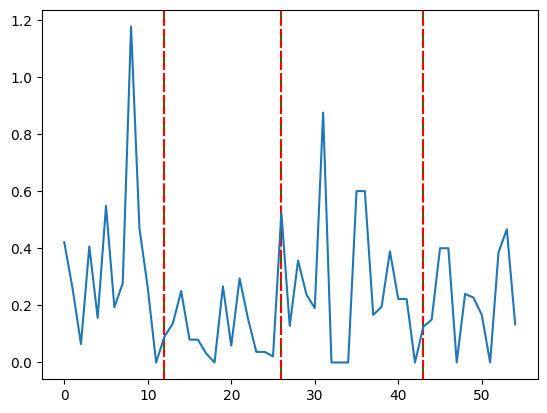

In [49]:
print_graph(lines_easy, computed_cuts)

## Testing con istanze difficili

Con la procedura sopra esposta è possibile valutare l'efficacia dell'algoritmo anche con un dataset più difficile.

Il dataset presentato è formato da argomenti di lunghezza sensibilmente diversa, inoltre, i concetti esposti sono semanticamente vicini.

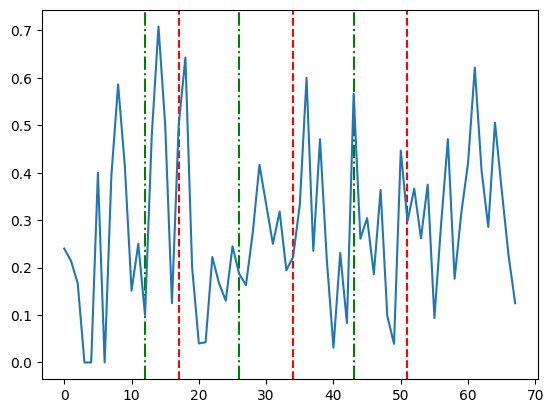

In [50]:
computed_cuts_hard = [int((i+1)*(len(line_hard) - 1)/(cuts_num+1)) for i in range(cuts_num)]
print_graph(line_hard, computed_cuts_hard)

['count', 'word', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
[87, 'quantum', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 4, 6, 4, 0, 9, 3, 8, 6, 3, 2, 2, 2, 1, 3, 1, 2, 3, 2, 3, 3, 3, 2, 5]
[56, 'computer', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 5, 2, 0, 10, 4, 4, 1, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 3, 1, 2, 0, 2]
[41, 'language', 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 2, 0, 1, 4, 1, 1, 3, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 'use', 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

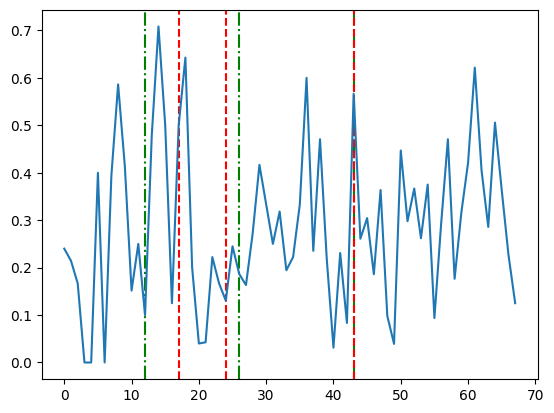

In [51]:
freqs, words = get_ds(line_hard)
lines_vec = get_line_vecs(line_hard, words)
part_sum = get_part_vec(lines_vec, computed_cuts)
computed_cuts = compute_tile(lines_vec, part_sum, computed_cuts)
print_graph(line_hard, computed_cuts)

Si può notare dal grafico risultante che l'algoritmo avvicina i tagli al target desiderato, senza però ottenere le segmentazioni ottime.

Il primo taglio non viene mosso rispetto all'inizializzazione naive, questo perché tra l'indice desiderato e quello calcolato si trova un picco che non favorisce lo spostamento.